In [280]:
import pandas as pd

In [281]:
df = pd.read_csv("../Data/daily-min-temperatures.csv", header=0, parse_dates=[0])

In [282]:
df['t'] = df['Temp'].shift(1)

In [283]:
train , test = df[1:df.shape[0] - 7] , df[df.shape[0]-7 : ]

In [284]:
X_train , y_train = train['t'] , train['Temp']
X_test , y_test = test['t'] , test['Temp']

In [285]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test , X_test)

3.4228571428571413

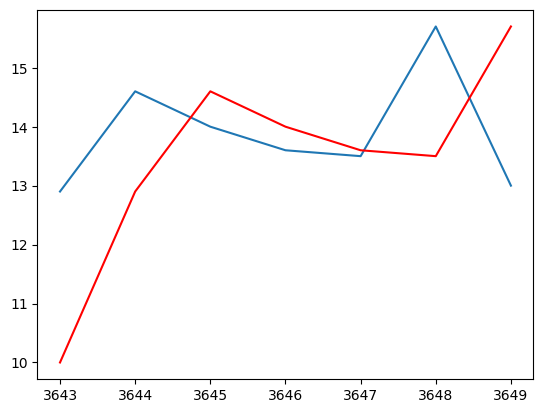

In [286]:
from matplotlib import pyplot as plt

plt.plot(y_test)
plt.plot(X_test , color = 'red')

In [287]:
from statsmodels.tsa.ar_model import AutoReg

In [288]:
model = AutoReg(df.Temp[1:df.shape[0]-1] , 5)

In [289]:
model_fit = model.fit()

In [290]:
model_fit.ar_lags

[1, 2, 3, 4, 5]

In [291]:
pred = model_fit.predict(start =len(train) , end = (len(train) + len(test)))

In [292]:
y_test[:-1]

/tmp/ipykernel_203028/1979825217.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test[:-1]


3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
Name: Temp, dtype: float64

In [293]:
pred

3643    12.999930
3644    13.629543
3645    13.241660
3646    12.848300
3647    13.239580
3648    14.827605
3649    14.009357
3650          NaN
dtype: float64

In [294]:
mean_squared_error(y_true=y_test , y_pred= pred[:-1])

/tmp/ipykernel_203028/664684739.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  mean_squared_error(y_true=y_test , y_pred= pred[:-1])


0.5627996770195606

In [295]:
from sklearn.metrics import mean_absolute_percentage_error

In [296]:
mean_absolute_percentage_error(y_true= y_test , y_pred= pred[:-1])

/tmp/ipykernel_203028/1328086214.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  mean_absolute_percentage_error(y_true= y_test , y_pred= pred[:-1])


0.04802215203524545

/tmp/ipykernel_203028/3425964153.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(pred[:-1] , color = "red")


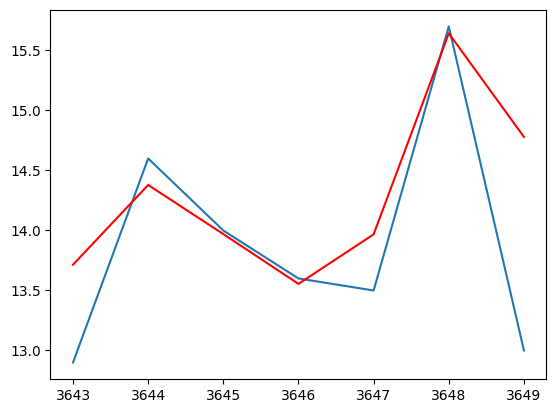

In [301]:
plt.plot(y_test)
plt.plot(pred[:-1] , color = "red")

In [298]:
pred[:-1] = pred[:-1] * 0.055 + pred[:-1]

/tmp/ipykernel_203028/1885245611.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred[:-1] = pred[:-1] * 0.055 + pred[:-1]


In [299]:
pred

3643    13.714926
3644    14.379168
3645    13.969952
3646    13.554956
3647    13.967757
3648    15.643123
3649    14.779872
3650          NaN
dtype: float64

In [302]:
mean_absolute_percentage_error(y_test , pred[:-1])

/tmp/ipykernel_203028/4102039708.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  mean_absolute_percentage_error(y_test , pred[:-1])


0.03699156794484416